Parsing ../data/ZrTi alloys/s3_matryca15_25mN_spacing5um.TXT


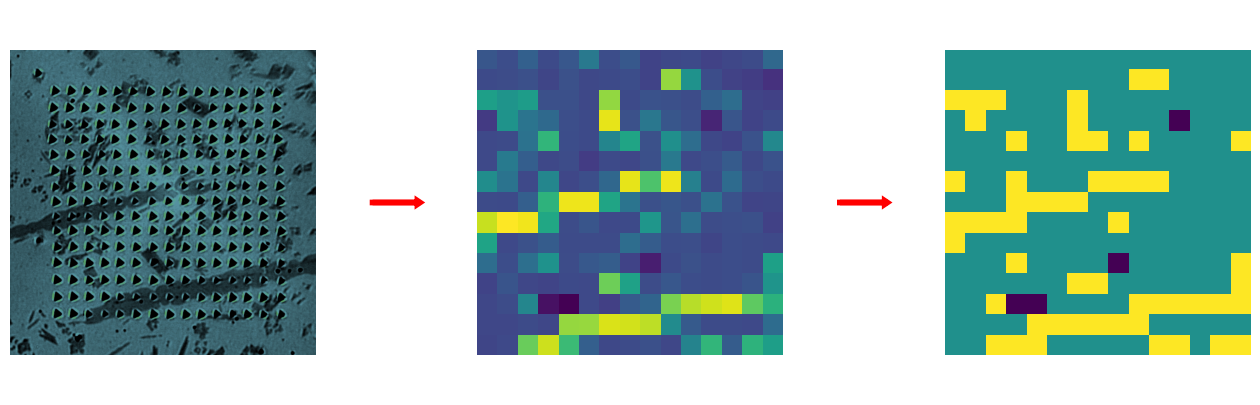

In [10]:
from pathlib import Path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sph

from amorphous_metals.convert import convert_raw_to_df

df = convert_raw_to_df("../data/ZrTi alloys/s3_matryca15_25mN_spacing5um.TXT")
image_dir = Path("../amorphous_metals/streamlit/Home")

fig, ax = plt.subplots(1, 5, width_ratios=[4, 1, 4, 1, 4])
fig.set_figheight(5)
fig.set_figwidth(16)
fig.canvas.header_visible = False  # type: ignore

ax[0].imshow(mpimg.imread(image_dir / "microscope_sample_enhanced.jpg"))
ax[0].set_axis_off()

ax[1].arrow(
    0.15,
    0.5,
    0.5,
    0,
    head_width=0.03,
    head_length=0.03,
    linewidth=4,
    color="r",
    length_includes_head=True,
)
ax[1].set_ylim(-1, 2)
ax[1].set_xlim(0, 0.8)
ax[1].set_axis_off()

ax[2].set_axis_off()
ax[2].imshow(df[["HIT (O&P) [MPa]"]].to_numpy().reshape((15, -1)))

ax[3].arrow(
    0.15,
    0.5,
    0.5,
    0,
    head_width=0.03,
    head_length=0.03,
    linewidth=4,
    color="r",
    length_includes_head=True,
)
ax[3].set_ylim(-1, 2)
ax[3].set_xlim(0, 0.8)
ax[3].set_axis_off()

z_example = sph.linkage(df, method="complete", metric="euclidean")
cluster = sph.fcluster(z_example, 3, criterion="maxclust") * -1 + 3
cluster = np.array([0 if val == 1 else 1 if val == 0 else val for val in cluster])
cluster = cluster.reshape((15, -1))
ax[4].imshow(cluster)
ax[4].set_axis_off()

plt.show()
fig.savefig(image_dir  / "process.svg", transparent=True)